<a href="https://colab.research.google.com/github/aliciamonteiro/Heuristicas/blob/main/Caixeiro-viajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema do Caixeiro Viajante Simétrico**

> O Problema do Caixeiro Viajante (TSP) é um problema de otimização combinatória em que um vendedor (ou caixeiro viajante) deve visitar um conjunto de cidades uma única vez e retornar à cidade de origem, minimizando a distância total percorrida. No TSP simétrico, a distância entre duas cidades é a mesma em ambas as direções, ou seja, a distância de A para B é igual à distância de B para A.

O TSP foi formulado formalmente em 1930, mas a sua popularidade cresceu a partir dos anos 50 com o advento da computação e da teoria dos grafos. M. Dantzig, J. R. Fulkerson, e S. Johnson contribuíram para sua formulação matemática e desenvolvimento de algoritmos para encontrar soluções aproximadas.

O TSP é um problema NP-difícil, o que significa que não existe um algoritmo conhecido para encontrar a solução ótima em tempo polinomial para todas as instâncias do problema. Portanto, a pesquisa em TSP inclui tanto métodos exatos para instâncias menores quanto algoritmos de aproximação e heurísticas para problemas de maior escala.




## Modelagem de programação matemática



Seja o grafo G = (Cidades, A), onde Cidades é conjunto de cidades (clientes) e A o conjunto de
arcos ligando duas cidades, isto é, A = {(i, j) | i 6= j}.
Seja dij a distância da cidade i para a cidade j.

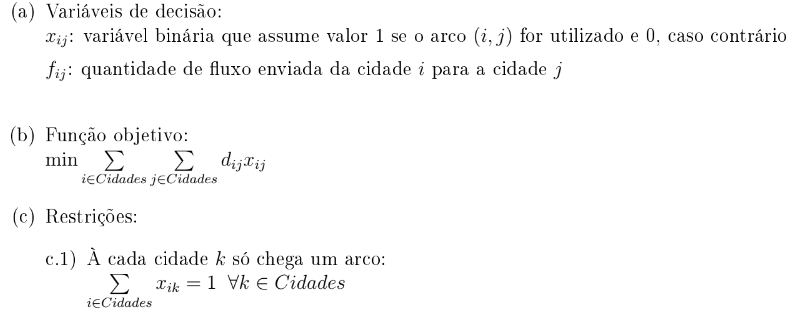

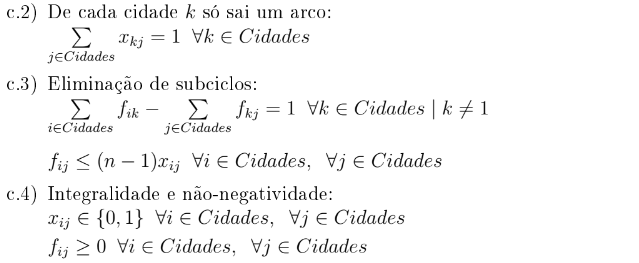

### Modelagem e resolução do problema


In [ ]:
%pip install gurobipy

In [ ]:
import gurobipy as gp
from gurobipy import GRB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# --- Função para ler a matriz de distâncias de um arquivo ---
def ler_matriz_distancias(arquivo):
    # Lê a matriz de distâncias de um arquivo e retorna o número de cidades e a matriz de distâncias
    with open(arquivo, 'r') as f:
        linhas = f.readlines()
        n = int(linhas[0].strip())  # Número de cidades
        distancias = []
        for linha in linhas[1:]:
            distancias.append(list(map(int, linha.split())))
    print("Matriz de distâncias lida do arquivo:")
    for linha in distancias:
        print(linha)
    return n, distancias

# --- Leitura da matriz de distâncias ---
#caminho_arquivo = "/content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema do Caixeiro Viajante simétrico /Caixeiro Viajante_OK/Dist5_OK.txt"
#caminho_arquivo = "/content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema do Caixeiro Viajante simétrico /Caixeiro Viajante_OK/Dist17_OK.txt"
caminho_arquivo = "/content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema do Caixeiro Viajante simétrico /Caixeiro Viajante_OK/Dist24_OK.txt"

n, distancias = ler_matriz_distancias(caminho_arquivo)

Matriz de distâncias lida do arquivo:
[0, 257, 187, 91, 150, 80, 130, 134, 243, 185, 214, 70, 272, 219, 293, 54, 211, 290, 268, 261, 175, 250, 192, 121]
[257, 0, 196, 228, 112, 196, 167, 154, 209, 86, 223, 191, 180, 83, 50, 219, 74, 139, 53, 43, 128, 99, 228, 142]
[187, 196, 0, 158, 96, 88, 59, 63, 286, 124, 49, 121, 315, 172, 232, 92, 81, 98, 138, 200, 76, 89, 235, 99]
[91, 228, 158, 0, 120, 77, 101, 105, 159, 156, 185, 27, 188, 149, 264, 82, 182, 261, 239, 232, 146, 221, 108, 84]
[150, 112, 96, 120, 0, 63, 56, 34, 190, 40, 123, 83, 193, 79, 148, 119, 105, 144, 123, 98, 32, 105, 119, 35]
[80, 196, 88, 77, 63, 0, 25, 29, 216, 124, 115, 47, 245, 139, 232, 31, 150, 176, 207, 200, 76, 189, 165, 29]
[130, 167, 59, 101, 56, 25, 0, 22, 229, 95, 86, 64, 258, 134, 203, 43, 121, 164, 178, 171, 47, 160, 178, 42]
[134, 154, 63, 105, 34, 29, 22, 0, 225, 82, 90, 68, 228, 112, 190, 58, 108, 136, 165, 131, 30, 147, 154, 36]
[243, 209, 286, 159, 190, 216, 229, 225, 0, 207, 313, 173, 29, 126, 248, 238,

In [ ]:
# Criação do modelo
modelo = gp.Model("Problema do Caixeiro Viajante")

# Variáveis de decisão: x[i, j] = 1 se a aresta (i, j) for utilizada na solução
x = modelo.addVars([(i, j) for i in range(n) for j in range(n) if i != j], vtype=GRB.BINARY, name="x")

In [ ]:
# 1. Cada cidade deve ter exatamente uma entrada e uma saída
for i in range(n):
    modelo.addConstr(gp.quicksum(x[i, j] for j in range(n) if j != i) == 1, name=f"saida_{i}")
    modelo.addConstr(gp.quicksum(x[j, i] for j in range(n) if j != i) == 1, name=f"entrada_{i}")

# 2. Eliminação de subtours (usando variáveis auxiliares u)
u = modelo.addVars(n, vtype=GRB.CONTINUOUS, name="u")  # Variáveis auxiliares
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            modelo.addConstr(u[i] - u[j] + n * x[i, j] <= n - 1, name=f"subtour_{i}_{j}")


In [ ]:
# Função objetivo
modelo.setObjective(
    gp.quicksum(distancias[i][j] * x[i, j] for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

In [ ]:
# Resolver o modelo
modelo.setParam('OutputFlag', 0)  # Desativa logs de saída
modelo.optimize()

# Exibir solução
if modelo.status == GRB.OPTIMAL:
    print(f"\nCusto mínimo: {modelo.objVal}")

    # Inicializa a matriz de solução
    solucao = [[0 for _ in range(n)] for _ in range(n)]

    # Preenche a matriz de solução apenas para combinações válidas de (i, j)
    for i in range(n):
        for j in range(n):
            if (i, j) in x:  # Garante que a variável x[i, j] existe
                if x[i, j].x > 0.5:  # Verifica se a aresta (i, j) está na solução
                    solucao[i][j] = 1

    # Reconstruir a rota
    print("\nRota encontrada:")
    inicio = 0
    rota = [inicio]
    while len(rota) < n:
        for j in range(n):
            if solucao[inicio][j] == 1:
                rota.append(j)
                inicio = j
                break
    print(" -> ".join(map(str, rota + [rota[0]])))  # Exibe a rota circular
else:
    print("Nenhuma solução ótima encontrada.")


Custo mínimo: 1272.0

Rota encontrada:
0 -> 15 -> 10 -> 2 -> 6 -> 5 -> 23 -> 7 -> 20 -> 4 -> 9 -> 16 -> 21 -> 17 -> 18 -> 14 -> 1 -> 19 -> 13 -> 12 -> 8 -> 22 -> 3 -> 11 -> 0
